In [40]:
import pandas as pd

df = pd.read_excel('data.xlsx')
df.columns = df.iloc[0]
df = df[1:]
df = df.dropna()
df = df.reset_index(drop=True)
df.head(3)

,0,code,message,message_english,is_code_related
0,1,\nFile:amigos.html\nCode modifications:\n@@ -2...,Merge pull request #1 from mumuvrf/franco\n\na...,Merge pull request #1 from mumuvrf/franco\n\na...,1
1,2,\nFile:amigos.html\nCode modifications:\n@@ -2...,alteracao campus mobile,Change Mobile Campus,0
2,3,\nFile:css/index.css\nCode modifications:\n@@ ...,Corrige os botões,Corrects the buttons,1


In [41]:
df['is_code_related'] = df['is_code_related'].apply(lambda x: "yes" if x == 1 else "no")

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

model = Pipeline([
    ('vectorizer', CountVectorizer(binary=True)),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(df['message_english'], df['is_code_related'], test_size=0.2)

In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1-score: {f1:.2f}')

F1-score: 0.84


[[0.86153846 0.13846154]
 [0.16814159 0.83185841]]


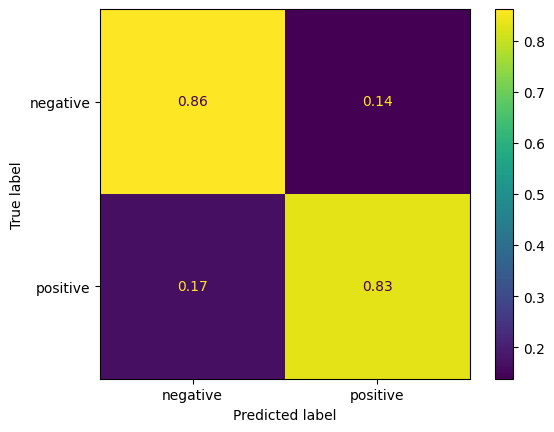

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

c = confusion_matrix(y_test, y_pred, normalize='true')
print(c)
_ = ConfusionMatrixDisplay(c, display_labels=['negative', 'positive']).plot()